In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import re
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] =False
%matplotlib widget

In [9]:
def extra_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    local_times = []
    node1_times = []
    pattern = r'Local time : (\d+)\nNode1 time : (\d+)'
    matches = re.findall(pattern, data)
    for match in matches:
        local_times.append(int(match[0]))
        node1_times.append(int(match[1]))
    return np.array(local_times),np.array(node1_times)

In [29]:
local_times_CI10,node1_times_CI10 = extra_data('delay_CI10.txt')
delta_CI10 = local_times_CI10-node1_times_CI10
local_times_CI50,node1_times_CI50 = extra_data('delay_CI50.txt')
delta_CI50 = local_times_CI50-node1_times_CI50
local_times_CI100,node1_times_CI100 = extra_data('delay_CI100.txt')
delta_CI100 = local_times_CI100-node1_times_CI100

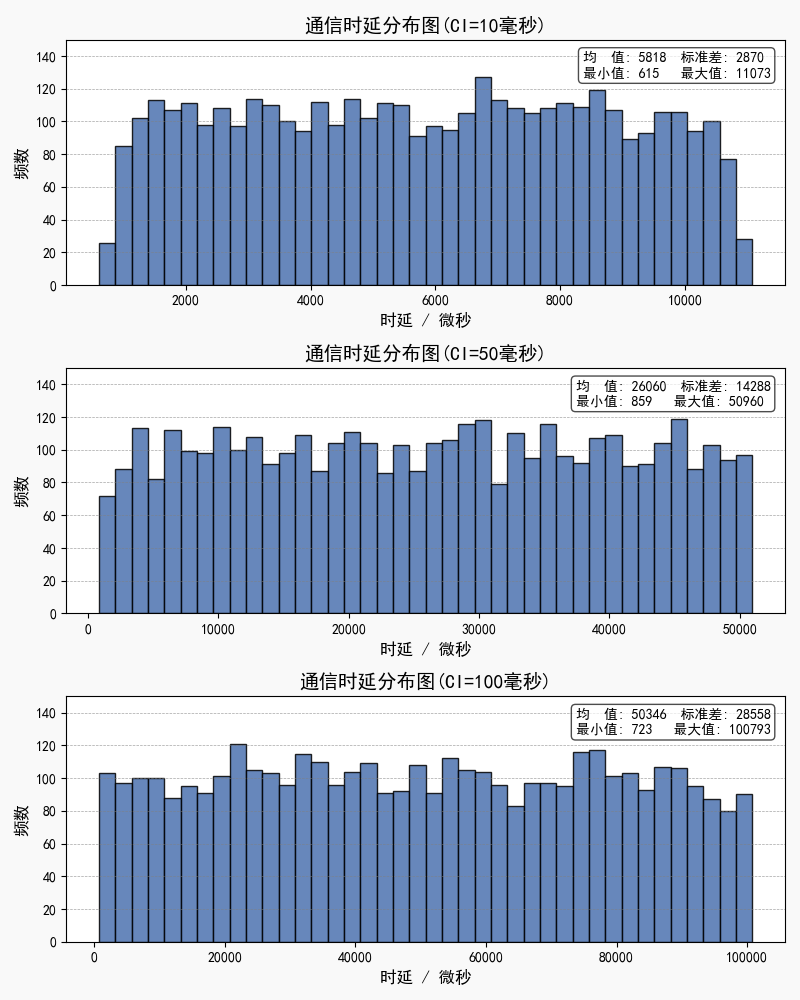

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(delta, title, num_bins=40, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # 确定开始和结束的整10数
    start_bin = int(np.floor(delta.min() / 10)) * 10
    end_bin = int(np.ceil(delta.max() / 10)) * 10
    
    # 计算bin的宽度
    bin_width = (end_bin - start_bin) / num_bins
    bins = np.arange(start_bin, end_bin + bin_width, bin_width)

    # 绘制直方图
    n, bins, patches = ax.hist(delta, bins=bins, color='#4c72b0', edgecolor='black', alpha=0.85)
    ax.set_xlabel('时延 / 微秒', fontsize=12, fontweight='bold')
    ax.set_ylabel('频数', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # 设置固定的 y 轴范围
    ax.set_ylim(0, 150)

    # 添加网格线（仅显示 y 轴网格）
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')

    # 调整刻度字体
    ax.tick_params(axis='both', which='major', labelsize=10)

    # 添加均值、标准差、最大值和最小值（左对齐）
    mean_val = np.mean(delta)
    std_val = np.std(delta)
    max_val = np.max(delta)
    min_val = np.min(delta)
    # 添加均值、标准差、最大值和最小值（框右对齐，框内文本左对齐）
    stats_text = (
        f"均  值: {int(mean_val)}  标准差: {int(std_val)}\n"
        f"最小值: {int(min_val)}   最大值: {int(max_val)}"
    )
    ax.text(
        0.98, 0.95, stats_text,  # 文本框放置在右上角
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',  # 文本框对齐方式
        multialignment='left',  # 框内文本左对齐
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
    )

# 创建一个图形和三个子图
plt.style.use("seaborn-v0_8-deep")
fig, axs = plt.subplots(3, 1, figsize=(8, 10))  # 调整图形大小适合 A4 页面

# 绘制三个直方图
plot_histogram(delta_CI10, '通信时延分布图(CI=10毫秒)', ax=axs[0])
plot_histogram(delta_CI50, '通信时延分布图(CI=50毫秒)', ax=axs[1])
plot_histogram(delta_CI100, '通信时延分布图(CI=100毫秒)', ax=axs[2])

# 调整子图间距
plt.subplots_adjust(hspace=0.4)

# 添加背景色
fig.patch.set_facecolor('#f9f9f9')

# 自动调整布局
plt.tight_layout()

# 保存并显示图像
plt.savefig('时延分布图.png', dpi=600, bbox_inches='tight')
plt.show()